In [11]:
import sqlite3
import matplotlib.pyplot as plt

In [12]:
class CovidRepository:

    table1 = "timeseries"
    table2 = "location"
    db_url = "C:\\Users\\julib\\Downloads\\covid19.db"

    def __init__(self):
        self.__connection = sqlite3.connect(self.db_url)

    def getAllCO(self):
        try:
            query = f"""
            select
            substring(date,1,4)*100+substring(date,6,7)  as Fecha_Mes,
            count(id) as total_id,
            sum(confirmed) as casos_confirmados,
            sum(deaths) as Muertes,
            sum(recovered) as casos_recuperados,
            substring(date,1,4) as Anio
            from timeseries where id in (select id  from location where administrative_area_level_1 = 'Colombia')
            group by Fecha_Mes
            order by Fecha_Mes;
            """
            cursor = self.__connection.cursor()
            cursor.execute(query)
            results = cursor.fetchall()
            return results
        except Exception as e:
            print(f"Error {e}")

    def getAllCOanios(self):
        try:
            query = f"""
            select
            substring(date,1,4) as Anio,
            count(id) as total_id,
            sum(confirmed) as casos_confirmados,
            sum(deaths) as Muertes,
            sum(recovered) as casos_recuperados
            from timeseries where id in (select id  from location where administrative_area_level_1 = 'Colombia')
            group by Anio
            order by Anio;
            """
            cursor = self.__connection.cursor()
            cursor.execute(query)
            results = cursor.fetchall()
            return results
        except Exception as e:
            print(f"Error {e}")


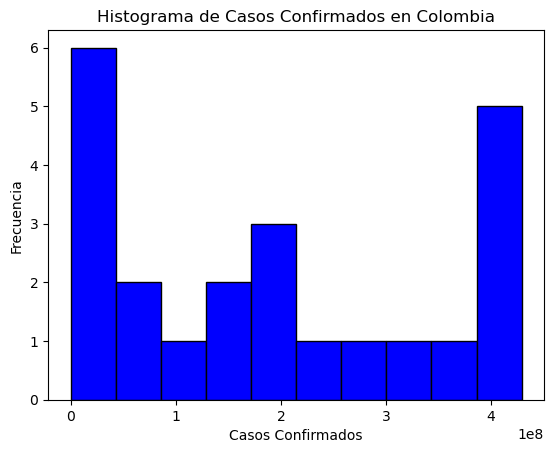

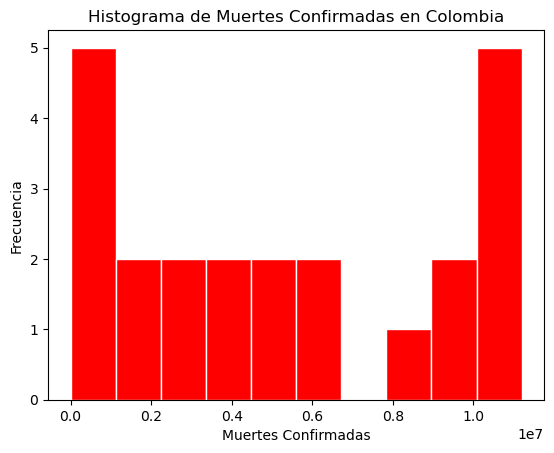

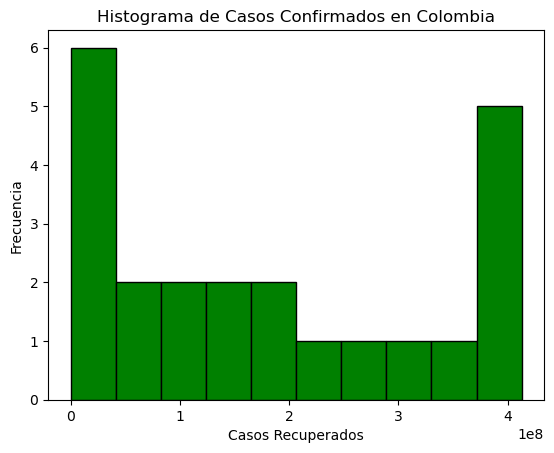

In [14]:
covid_repository=CovidRepository()
Base_Covid=covid_repository.getAllCO()
fechas_mes = [row[0] for row in Base_Covid]
casos_conf = [row[2] for row in Base_Covid]
Muertes_conf = [row[3] for row in Base_Covid]
casos_recup = [row[4] for row in Base_Covid]
Anio = [row[5] for row in Base_Covid]
Anios=set(Anio)

plt.hist(casos_conf, color= "blue", edgecolor='black')
plt.xlabel('Casos Confirmados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Casos Confirmados en Colombia')
plt.show()

plt.hist(Muertes_conf,color="red", edgecolor='white')
plt.xlabel('Muertes Confirmadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Muertes Confirmadas en Colombia')
plt.show()


plt.hist(casos_recup, color="green",  edgecolor='black')
plt.xlabel('Casos Recuperados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Casos Confirmados en Colombia')
plt.show()